# **Walmart Weekly Sales Prediction Using Machine Learning**

In [1]:
from google.colab import files
uploaded = files.upload('train.csv')

Saving train.csv to train.csv/train.csv


In [2]:
from google.colab import files
uploaded = files.upload('features.csv')

Saving features.csv to features.csv/features.csv


In [3]:
from google.colab import files
uploaded = files.upload('stores.csv')

Saving stores.csv to stores.csv/stores.csv


🔹 SECTION 1: Import Libraries & Load Data

In [4]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
train = pd.read_csv("train.csv/train.csv")
features = pd.read_csv("features.csv/features.csv")
stores = pd.read_csv("stores.csv/stores.csv")

🔹 SECTION 2: Data Preview

In [10]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [11]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


🔹 SECTION 3: Data Merging

In [13]:
merge_df = pd.merge(train, features, on=["Store", "Date"], how="inner")
merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


🔹 SECTION 4: Statistical Summary

In [14]:
merge_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


🔹 SECTION 5: Date Processing & Time Feature

In [15]:
from datetime import datetime

merge_df["DateTime"] = pd.to_datetime(merge_df["Date"])

🔹 SECTION 6: Weekly Sales Visualization (EDA)

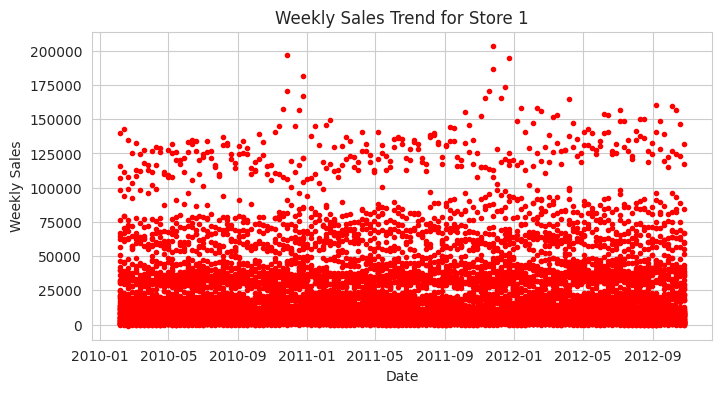

In [16]:
plt.figure(figsize=(8,4))
plt.plot(
    merge_df[merge_df.Store == 1]["DateTime"],
    merge_df[merge_df.Store == 1]["Weekly_Sales"],
    'r.'
)
plt.title("Weekly Sales Trend for Store 1")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


🔹 SECTION 7: Aggregating Weekly Sales

In [17]:
weekly_sales = merge_df.groupby(["Store", "Date"])["Weekly_Sales"].sum().reset_index()

walmart_df = pd.merge(weekly_sales, features, on=["Store", "Date"], how="inner")


🔹 SECTION 8: Feature Engineering

In [18]:
walmart_df["DateTime"] = pd.to_datetime(walmart_df["Date"])
walmart_df["Week"] = (
    (walmart_df["DateTime"] - walmart_df["DateTime"].min()).dt.days / 7
)

walmart_df["IsHolidayInt"] = walmart_df["IsHoliday"].astype(int)


🔹 SECTION 9: Train-Test Split (Base Features)

In [19]:
X = walmart_df[[
    "Temperature",
    "Fuel_Price",
    "CPI",
    "Unemployment",
    "Week",
    "IsHolidayInt"
]]

y = walmart_df["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# **📈 LINEAR REGRESSION ANALYSIS**

🔹 Model Training

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

🔹 Prediction & Evaluation

In [21]:
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test))

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R²:", r2_lr)
print("Linear Regression MAPE:", mape_lr)

Linear Regression RMSE: 560212.2760317368
Linear Regression R²: 0.018399963104079542
Linear Regression MAPE: 0.6647628870821392


🔹 Actual vs Predicted Plot

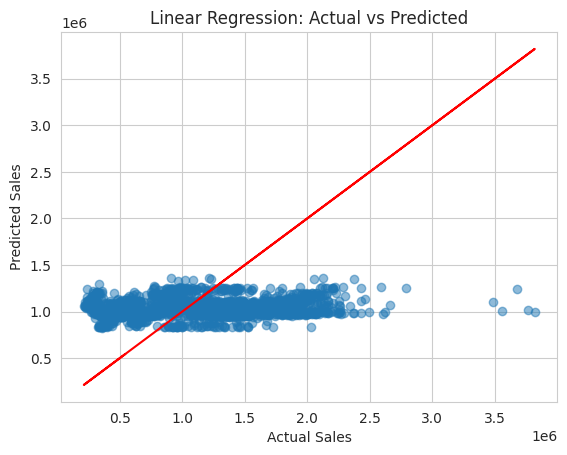

In [22]:
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot(y_test, y_test, 'r')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

# **🔍 LASSO REGRESSION (Dimensionality Reduction)**

🔹 Alpha Tuning

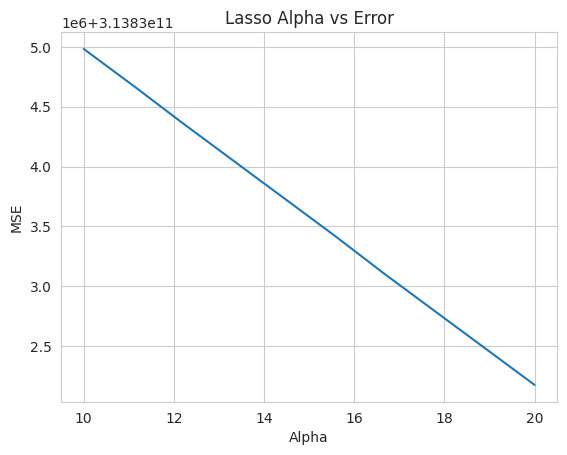

In [23]:
alphas = np.linspace(10, 20, 10)
errors = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    errors.append(mean_squared_error(y_test, lasso.predict(X_test)))

plt.plot(alphas, errors)
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("Lasso Alpha vs Error")
plt.show()

🔹 Final Lasso Model

In [24]:
lasso = Lasso(alpha=17)
lasso.fit(X_train, y_train)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
lasso_r2 = r2_score(y_test, lasso.predict(X_test))

print("Lasso RMSE:", lasso_rmse)
print("Lasso R²:", lasso_r2)

Lasso RMSE: 560208.0063886119
Lasso R²: 0.018414925524779746


🔹 Selected Features

In [25]:
lasso_coef = pd.Series(lasso.coef_, index=X_train.columns)
lasso_coef[lasso_coef != 0]


,0
Temperature,-309.075209
Fuel_Price,-8544.171359
CPI,-1667.414281
Unemployment,-45056.353642
Week,-150.558488
IsHolidayInt,95416.597841


## **🌲 RANDOM FOREST REGRESSION**

🔹 Model Training

In [26]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_jobs=-1, random_state=42)

🔹 Evaluation

In [27]:
y_pred_rf = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R²:", rf_r2)

Random Forest RMSE: 499408.83201242646
Random Forest R²: 0.2199152993481338


🔹 Actual vs Predicted

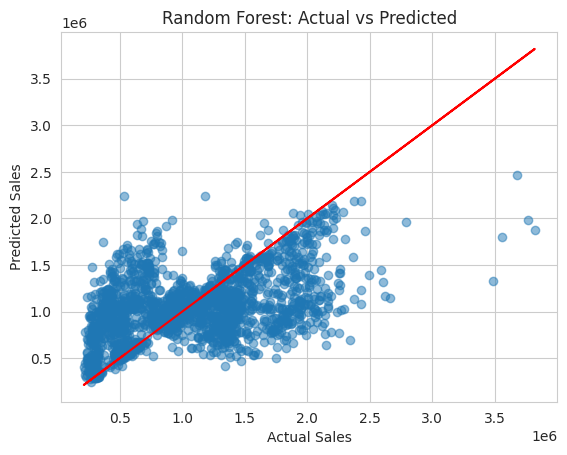

In [28]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot(y_test, y_test, 'r')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

🔹 Feature Importance

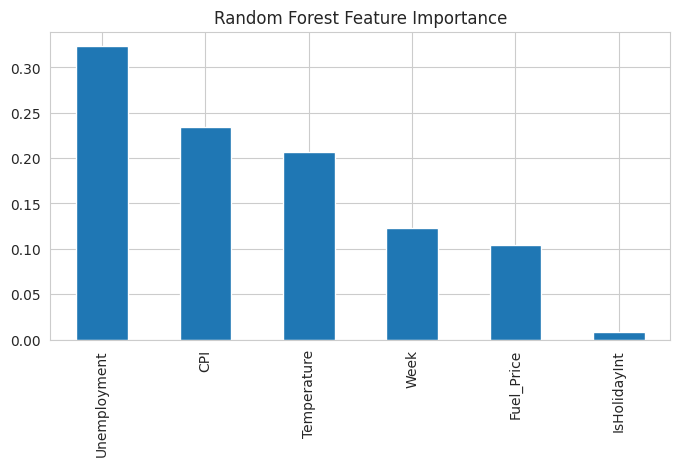

In [29]:
feature_importance = pd.Series(
    rf.feature_importances_, index=X_train.columns
).sort_values(ascending=False)

feature_importance.plot(kind="bar", figsize=(8,4))
plt.title("Random Forest Feature Importance")
plt.show()

## **🎄 HOLIDAY IMPACT ANALYSIS**

In [31]:
dept_impact = (
    merge_df.groupby(["Dept", "IsHoliday_x"])["Weekly_Sales"]
    .mean()
    .unstack()
)

dept_impact["Impact"] = dept_impact[True] - dept_impact[False]

dept_impact.sort_values("Impact", ascending=False).head(10)

IsHoliday_x,False,True,Impact
Dept,,,
72,47217.852117,94855.542259,47637.690142
5,20538.617153,32386.823702,11848.206549
55,10224.378094,17269.993274,7045.615180
7,23702.744635,30259.191356,6556.446721
14,14496.807073,19847.280267,5350.473194
18,6908.599161,11906.612807,4998.013647
92,74895.228867,79323.104667,4427.875799
6,4513.898625,7832.547844,3318.649219
22,10573.693869,13377.528237,2803.834368


## **📊 MODEL COMPARISON SUMMARY**

In [32]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression", "Random Forest"],
    "RMSE": [rmse_lr, lasso_rmse, rf_rmse],
    "R² Score": [r2_lr, lasso_r2, rf_r2]
})

comparison

,Model,RMSE,R² Score
0,Linear Regression,560212.276032,0.018400
1,Lasso Regression,560208.006389,0.018415
2,Random Forest,499408.832012,0.219915
